In [ ]:
  | f1         f2         f3         f4         f5         f6         f7         f8      
_____________________________________________________________________________________
x | 0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0
v | 1          1          1          1          1          1          1          1

In [22]:
A = np.zeros([2, 10])
A[0] = [9.5,8.5,7.5,6.5,5.5,4.5,3.5,2.5,1.5,0.5]
A[1] = np.ones(10)
print(A)
# (x, v) = A * f

[[9.5 8.5 7.5 6.5 5.5 4.5 3.5 2.5 1.5 0.5]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]


[ 0.05454545  0.04242424  0.03030303  0.01818182  0.00606061 -0.00606061
 -0.01818182 -0.03030303 -0.04242424 -0.05454545]

1.0000000000000004 4.163336342344337e-17


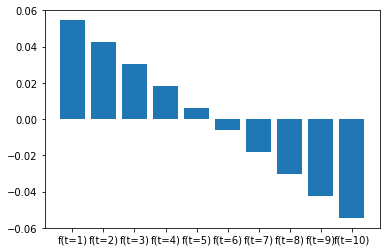

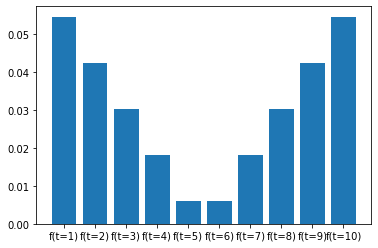

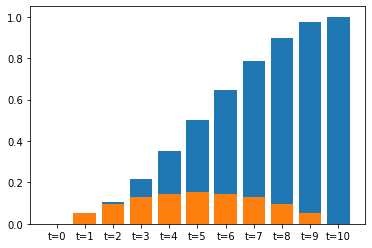

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

def solve_svd(A,b):
    U,s,Vh = svd(A)
    s += np.ones(len(s))/1e100
    
    # U diag(s) Vh x = b <=> diag(s) Vh x = U.T b = c
    c = np.dot(U.T,b)
    # diag(s) Vh x = c <=> Vh x = diag(1/s) c = w 
    w = np.dot(np.diag(1/s),c)
    # Vh x = w <=> x = Vh.H w 
    x = np.dot(Vh.conj().T,w)
    return x


A = np.zeros([10, 10])
A[0] = [9.5,8.5,7.5,6.5,5.5,4.5,3.5,2.5,1.5,0.5]
A[1] = np.ones(10)
b = np.zeros(10)
b[0] = 1


x_svd = solve_svd(A,b)
print(x_svd, end='\n\n')

groups = [f"f(t={i})" for i in range(1,11)]
plt.bar(groups, x_svd)
fig = plt.figure()
plt.bar(groups, abs(x_svd))
fig = plt.figure()

x = 0
v = 0
X_t = [0] * 11
V_t = [0] * 11
for i in range(10):
    x += x_svd[i]/2 + v
    v += x_svd[i]
    X_t[i+1] = x
    V_t[i+1] = v
    
groups = [f"t={i}" for i in range(11)]
plt.bar(groups, X_t)
plt.bar(groups, V_t)   
print(x, v)